In [1]:
ref='nb61-'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns


import random

import matplotlib

plt.style.use('seaborn-whitegrid')
matplotlib.rcParams.update({
    'font.family': 'serif',
    'axes.titlesize':16,
    'axes.labelsize':16,
    'axes.xmargin':0.1,
    'axes.ymargin':0.1,
    'legend.fontsize':16,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'lines.markersize': 10,
    'lines.linewidth' : 3,
    'font.size': 16
})



In [2]:
f = open("../reports/{}explore.txt".format(ref), "w")
f.write("Data Exploration File \n")
f.write("===================== \n")

23

# Importing Data

In [3]:

raw_data=pd.read_csv("../data/processed/cleaned_w_interp.csv",index_col=False )
raw_data.head()

,stamp,SubjectId,RunId,walk,speed,x,y,z,rms
0,1.527700e+09,52.0,1.0,52-1,0.1,-426.0,-102.0,124.0,262.840890
1,1.527700e+09,52.0,1.0,52-1,0.1,-413.0,-81.0,124.0,253.315350
2,1.527700e+09,52.0,1.0,52-1,0.1,-394.0,-69.0,126.0,242.124624
3,1.527700e+09,52.0,1.0,52-1,0.1,-367.0,-52.0,122.0,225.297581
4,1.527700e+09,52.0,1.0,52-1,0.1,-340.0,-36.0,118.0,208.822093


# Rounding Speeds to the nearest multiple of 'step'

In [4]:
step=0.1 # Change to 0.05 to make speeds in steps of 0.05 (suggested values 0.1, 0.05, 0.01)
raw_data['speed']=raw_data['speed'].map(lambda x: np.round(round(x/step)*step,2))
raw_data.head()


,stamp,SubjectId,RunId,walk,speed,x,y,z,rms
0,1.527700e+09,52.0,1.0,52-1,0.1,-426.0,-102.0,124.0,262.840890
1,1.527700e+09,52.0,1.0,52-1,0.1,-413.0,-81.0,124.0,253.315350
2,1.527700e+09,52.0,1.0,52-1,0.1,-394.0,-69.0,126.0,242.124624
3,1.527700e+09,52.0,1.0,52-1,0.1,-367.0,-52.0,122.0,225.297581
4,1.527700e+09,52.0,1.0,52-1,0.1,-340.0,-36.0,118.0,208.822093


In [5]:
# Extract individual walks
subject_id=raw_data['SubjectId'].values
walks=list(raw_data.drop_duplicates(subset=['walk'])['walk'].values)
#print('No. of available walks (time series) in the dataset is {} performed by {} subjects'.format(len(walks),len(set(subject_id))))
f.write('No. of available walks (time series) in the dataset is {} performed by {} subjects \n\n'.format(len(walks),len(set(subject_id))))

85

# Identify time discontinuity in walks

In [6]:
lags=[]
for walk in walks:
    walk_data=raw_data[raw_data['walk']==walk]
    stamps=walk_data['stamp'].values
    diff=np.diff(stamps)
    time_lag=np.where(diff<0.015,0,diff )
    lag_idx=np.nonzero(time_lag)
    lags.append(lag_idx)
    if time_lag.sum()>0:
        # print('{} discontinuity detected in walk: {} at indices: {} with lags {} sec'.format(len(lag_idx[0]),walk, list(lag_idx[0]), list(time_lag[lag_idx[0]])))
        f.write('{} discontinuity detected in walk: {} at indices: {} with lags {} sec \n'.format(len(lag_idx[0]),walk, list(lag_idx[0]), list(time_lag[lag_idx[0]])))
        # Drop data beyond the first discontinuity 
        walk_idx=np.array(walk_data.index)
        sliced_walk=walk_idx[lag_idx[0][0]:] #sliced from the first discontinuity to the end 
        raw_data=raw_data.drop(sliced_walk) #drop the sliced data from the raw data
        #print('{} samples dropped to eliminate discontinuity in walk {}!'.format(len(sliced_walk),walk))
        f.write('{} samples dropped to eliminate discontinuity in walk {}! \n'.format(len(sliced_walk),walk))
        f.write('\n')
         



# Calculating number of samples and no of distinct speeds for each walk

In [7]:
f.write('\n\n')
for walk in walks:
    walk_data=raw_data[raw_data['walk']==walk]
    walk_speeds=walk_data.drop_duplicates(subset=['speed'])
    f.write("Walk {} has {} samples and includes {} distinct binned speeds\n ".format(walk, len(walk_data), len(walk_speeds)))
    
data_speeds=raw_data.drop_duplicates(subset=['speed'])
f.write('Total number of samples in the dataset is {} and includes {} distinct speeds \n'.format(len(raw_data), len(data_speeds)))
print('Total number of samples in the dataset is {} and includes {} distinct speeds \n'.format(len(raw_data), len(data_speeds)))


Total number of samples in the dataset is 2039968 and includes 15 distinct speeds 



# Randomly selecting some subjects

In [8]:

subjects=list(set(subject_id))
sel_walks=[]
random.seed(15)
sel_subjects=random.sample(subjects,5) # Change the number of randomly selected subjects here
for subject in sel_subjects:
    this_data=raw_data[raw_data['SubjectId']==subject]
    runs=list(set(this_data['RunId'].values))# get set of all runs for this subject
    sel_run=random.sample(runs,1) #select only one run
    sel_walk=str(int(subject)) + '-' + str(int(sel_run[0]))
    sel_walks.append(sel_walk)


    

# Plotting box plots for x-accl per subject

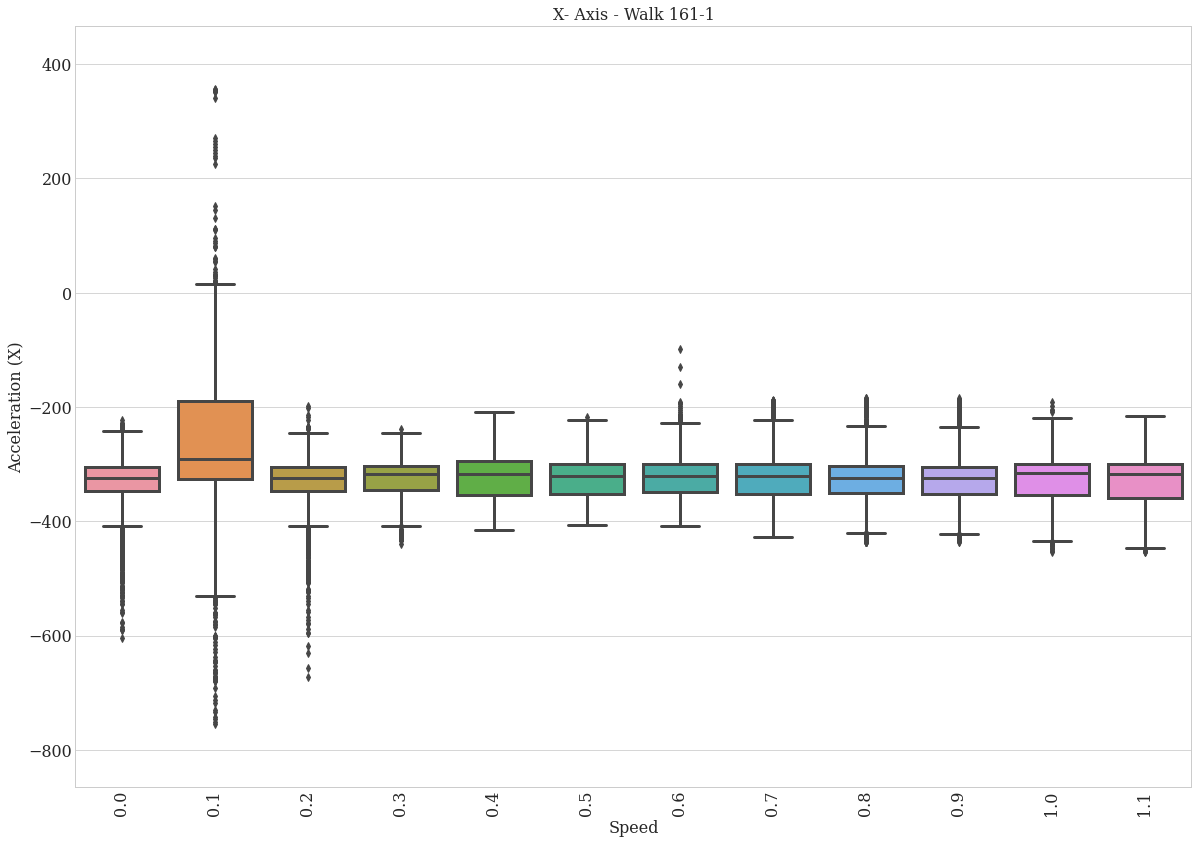

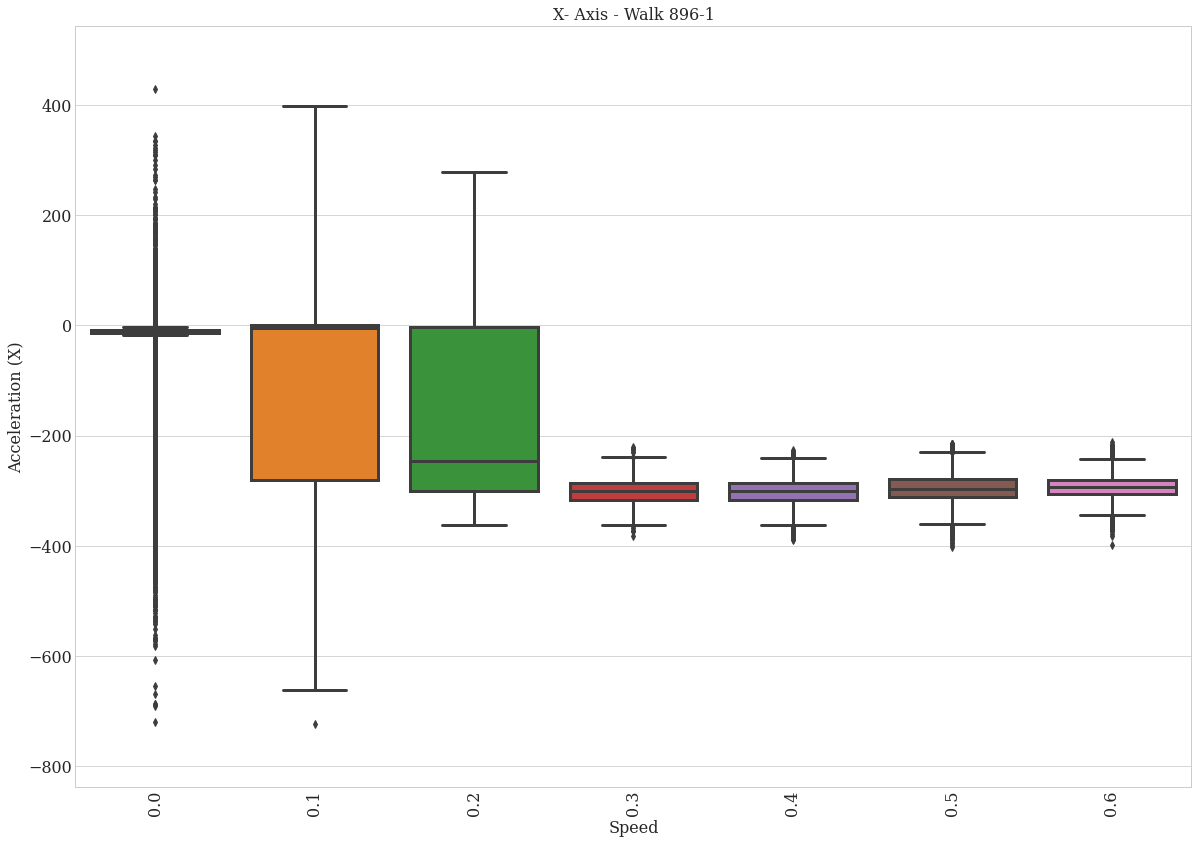

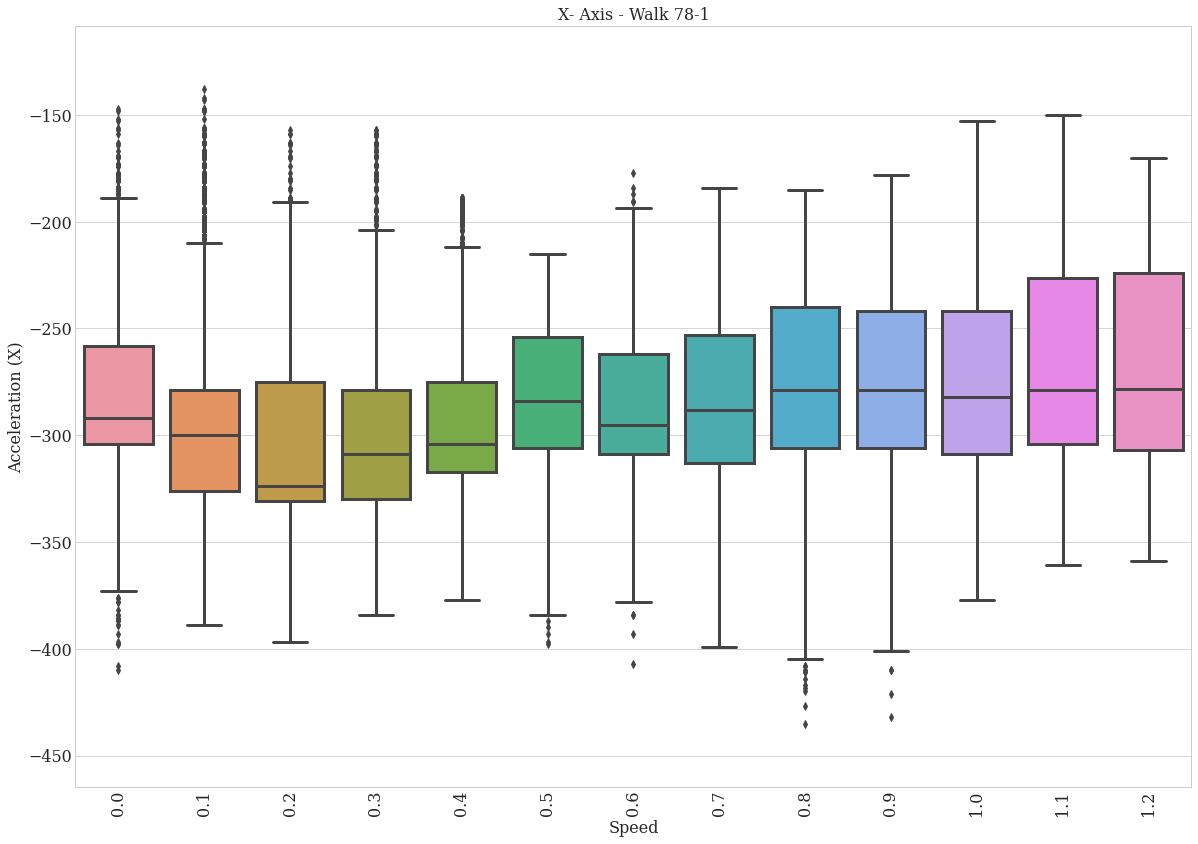

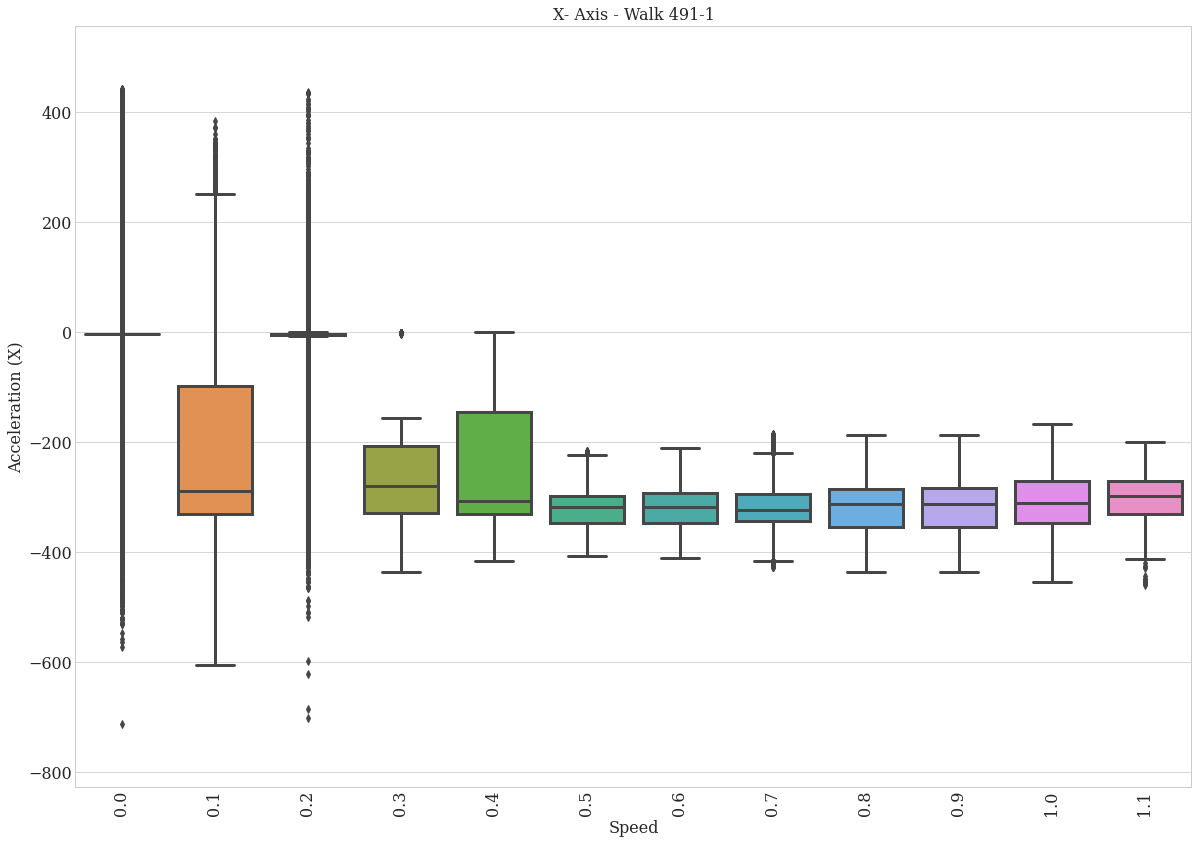

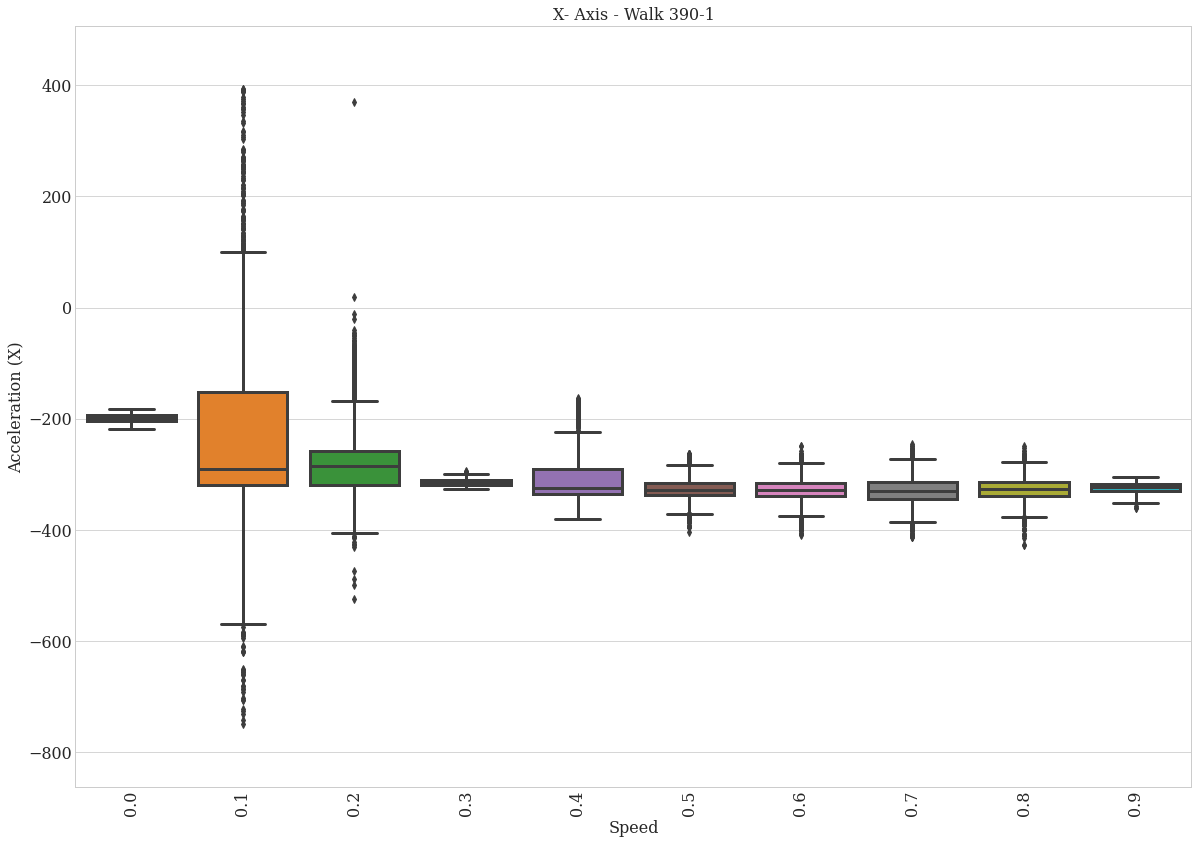

In [9]:

plt.rcParams["figure.figsize"] = (20,14)
ax={}
for i,walk in enumerate(sel_walks):
    this_data=raw_data[raw_data['walk']==walk]
    ax[i]=sns.boxplot(x='speed', y='x', data=this_data)
    ax[i].set_ylabel('Acceleration (X)')
    ax[i].set_xlabel('Speed')
    ax[i].set_title('X- Axis - Walk {}'.format(walk) )
    #ax[i].set_xticklabels(list(np.round(sorted_speeds,2)))
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 90)
    fig=ax[i].get_figure()
    plt.savefig("../reports/figures/{}boxplot_x_walk_{}.png".format(ref,walk))
    plt.show()

# Plotting box plots for y-accl per subject

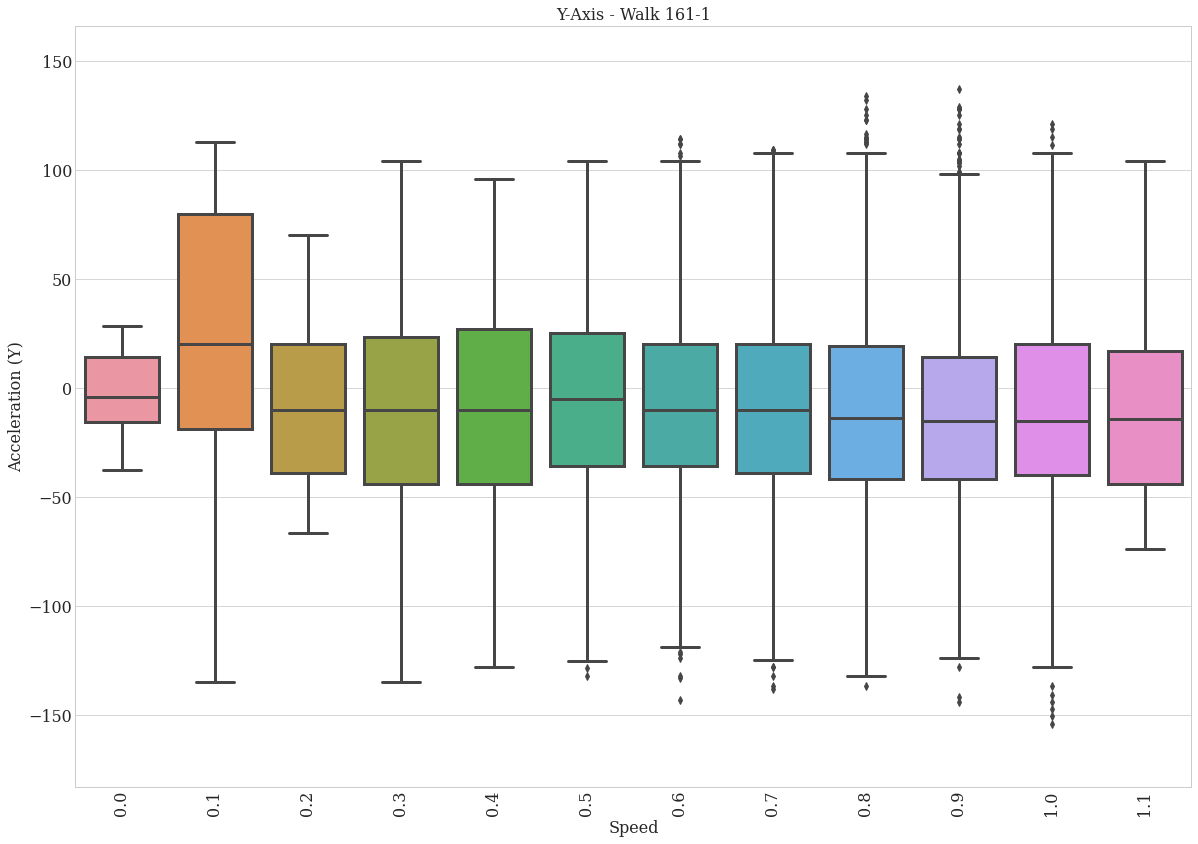

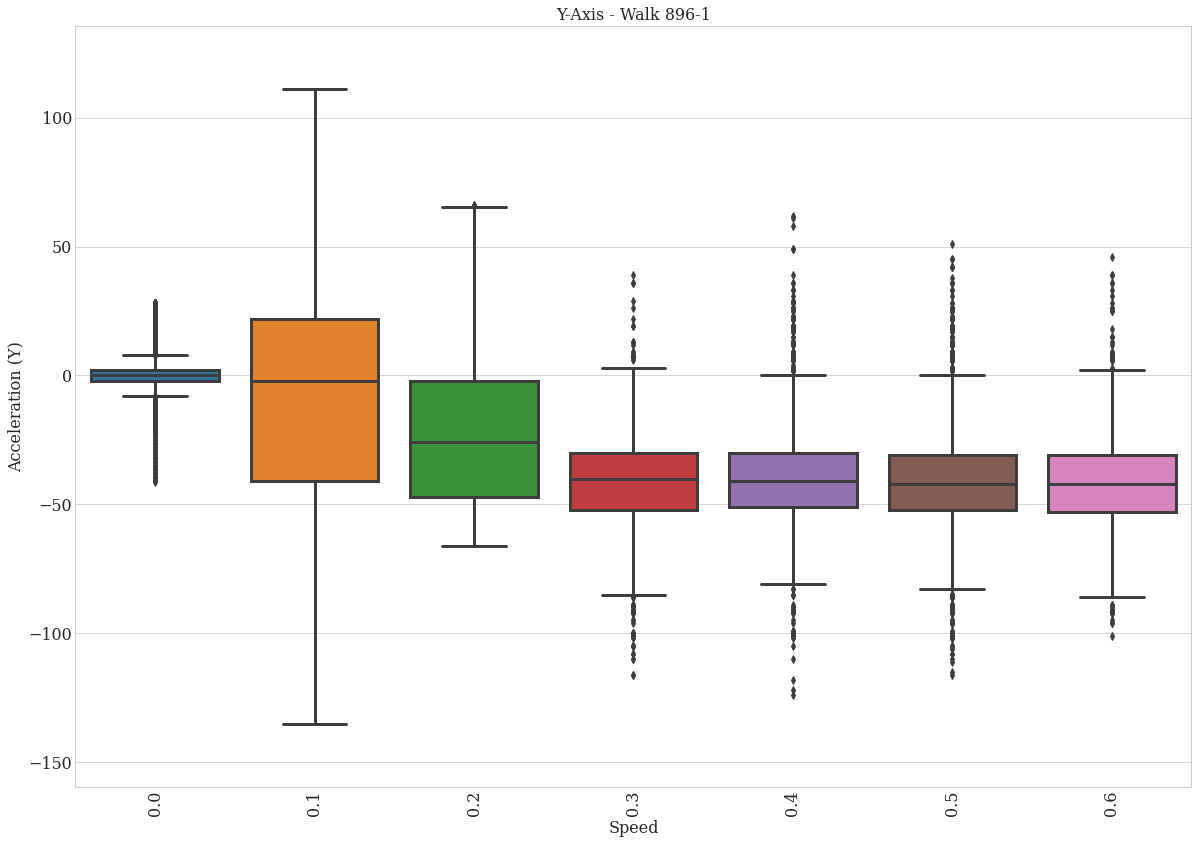

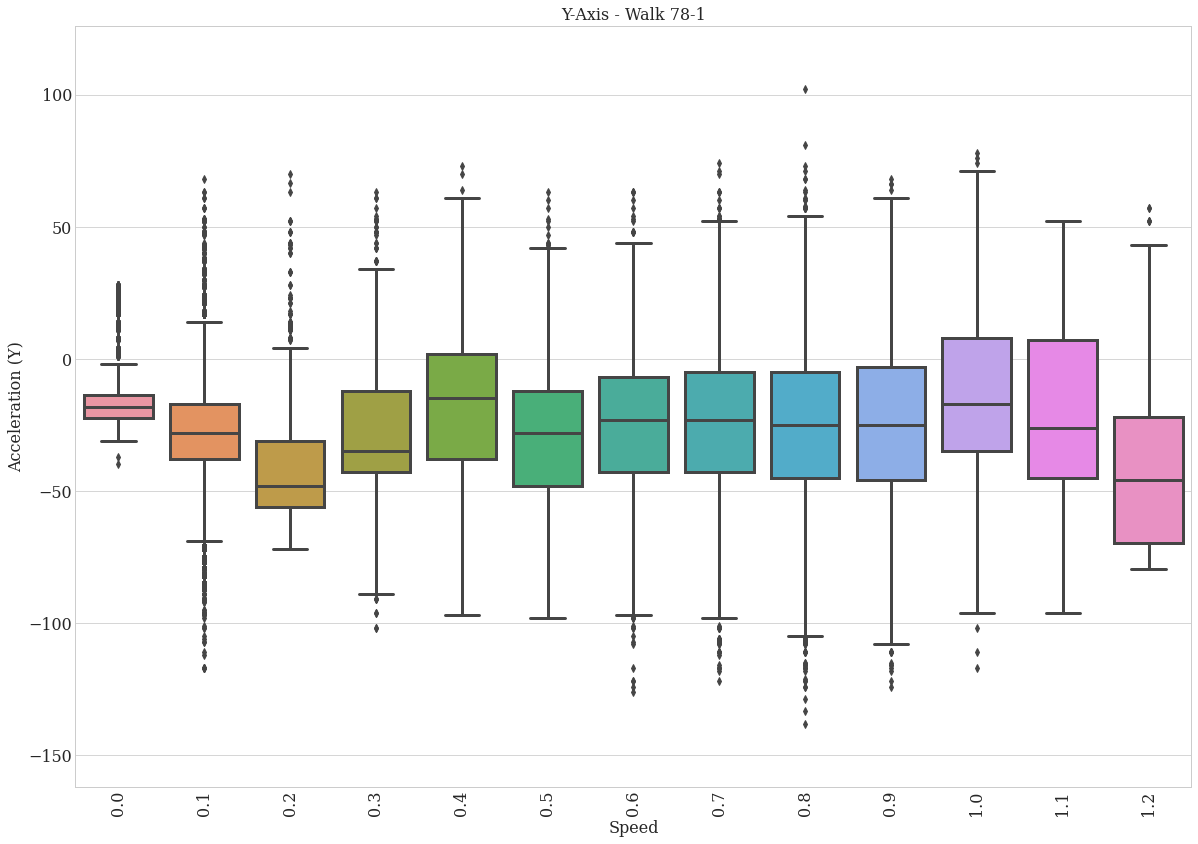

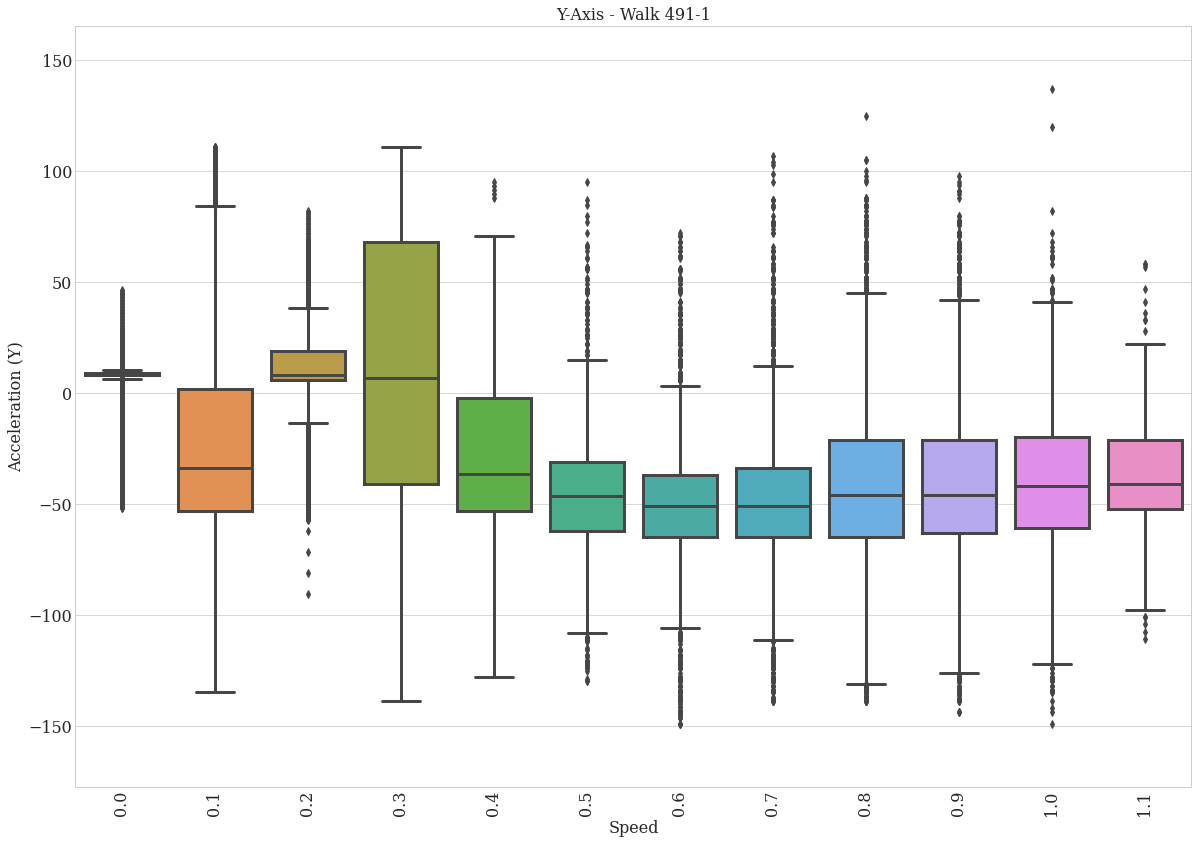

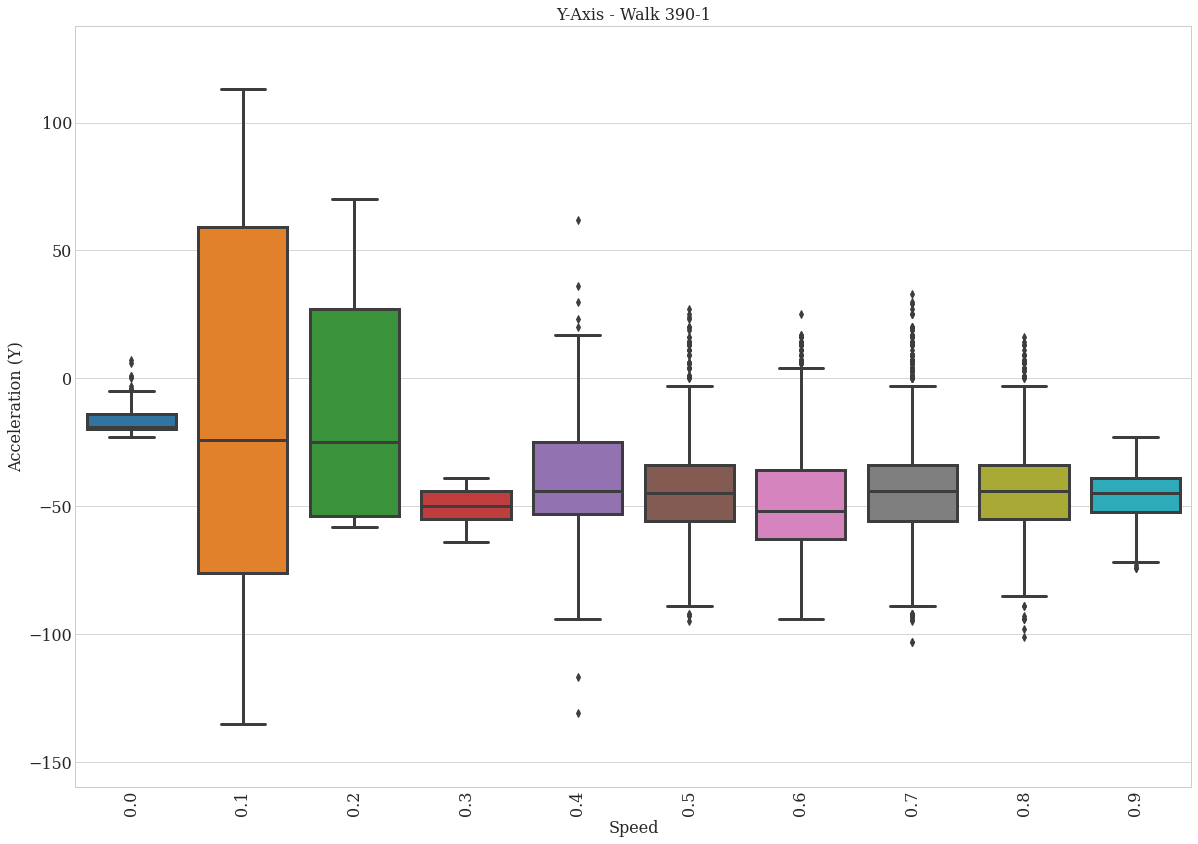

In [10]:
plt.rcParams["figure.figsize"] = (20,14)
ax={}
for i,walk in enumerate(sel_walks):
    this_data=raw_data[raw_data['walk']==walk]
    ax[i]=sns.boxplot(x='speed', y='y', data=this_data)
    ax[i].set_ylabel('Acceleration (Y)')
    ax[i].set_xlabel('Speed')
    ax[i].set_title('Y-Axis - Walk {}'.format(walk) )
    #ax[i].set_xticklabels(list(np.round(sorted_speeds,2)))
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 90)
    fig=ax[i].get_figure()
    fig.savefig("../reports/figures/{}boxplot_y_walk_{}.png".format(ref,walk))
    plt.show()

# Plotting box plots for z-accl per subject

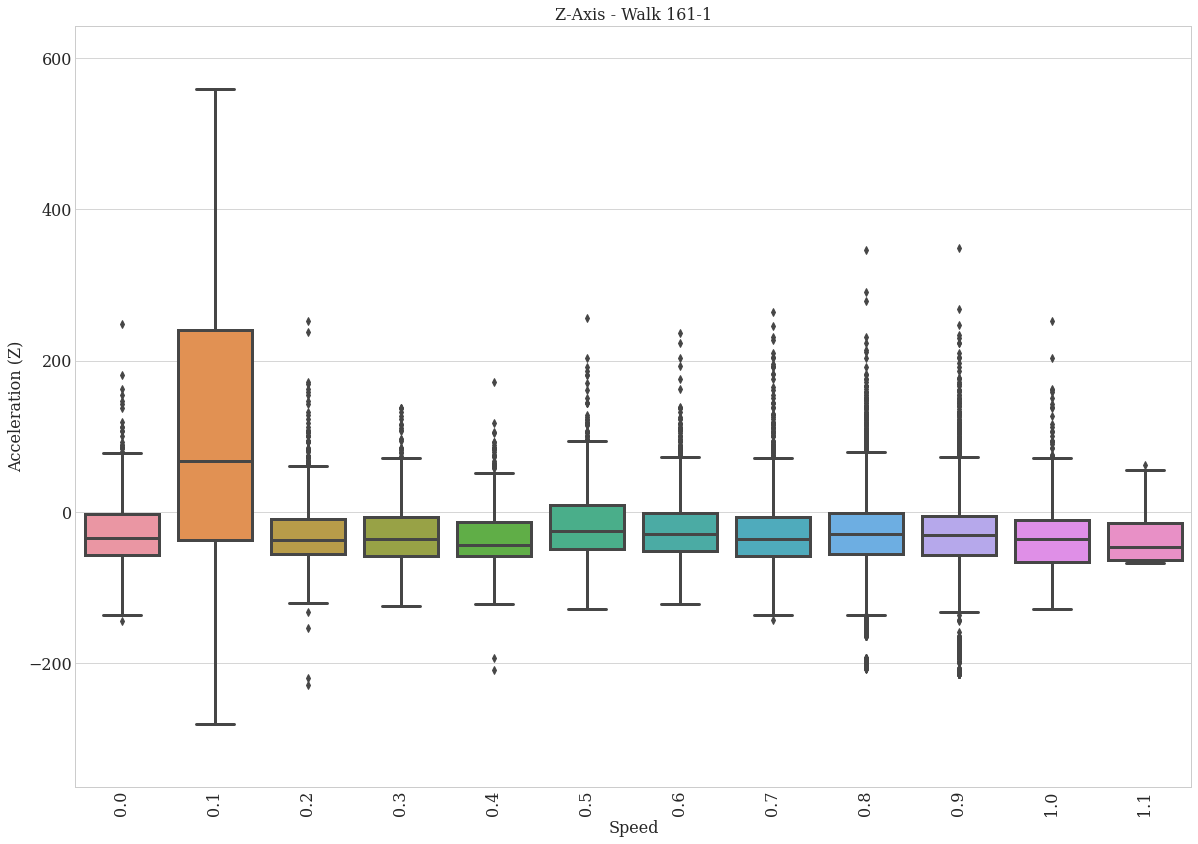

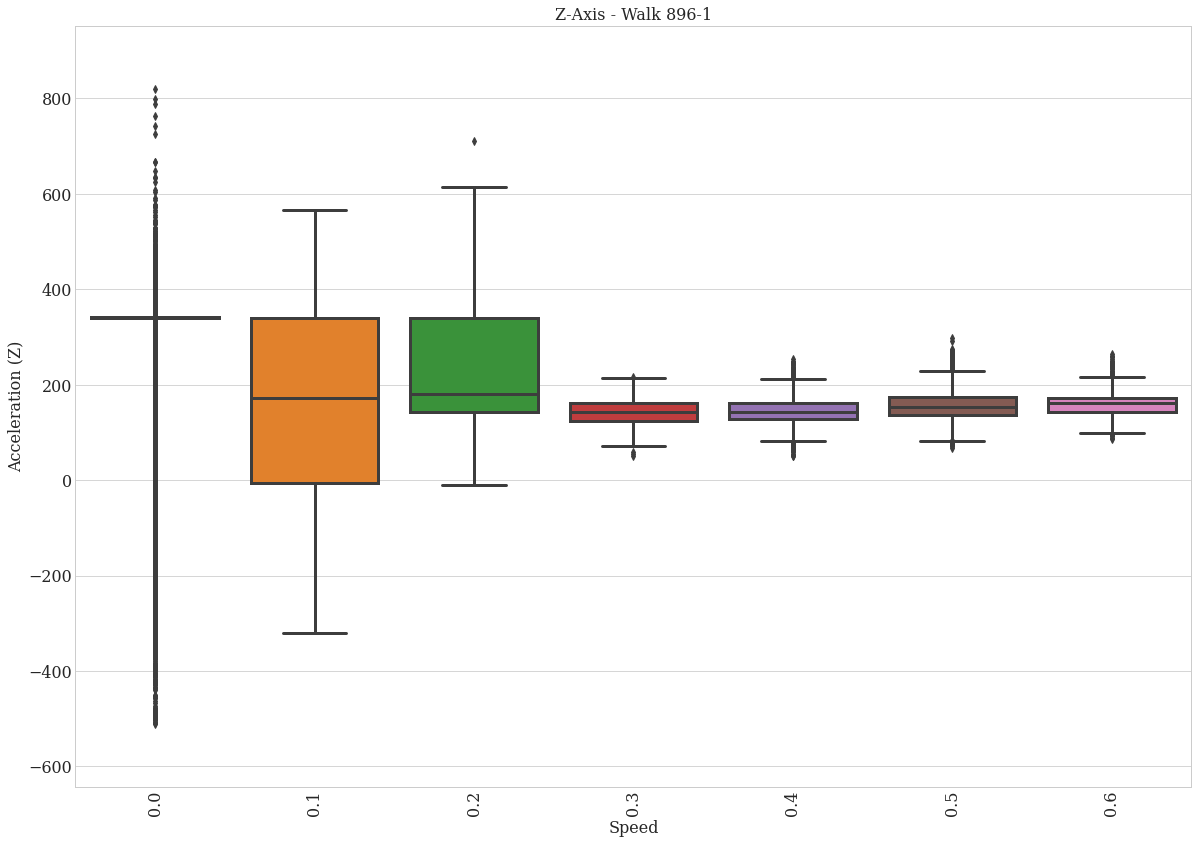

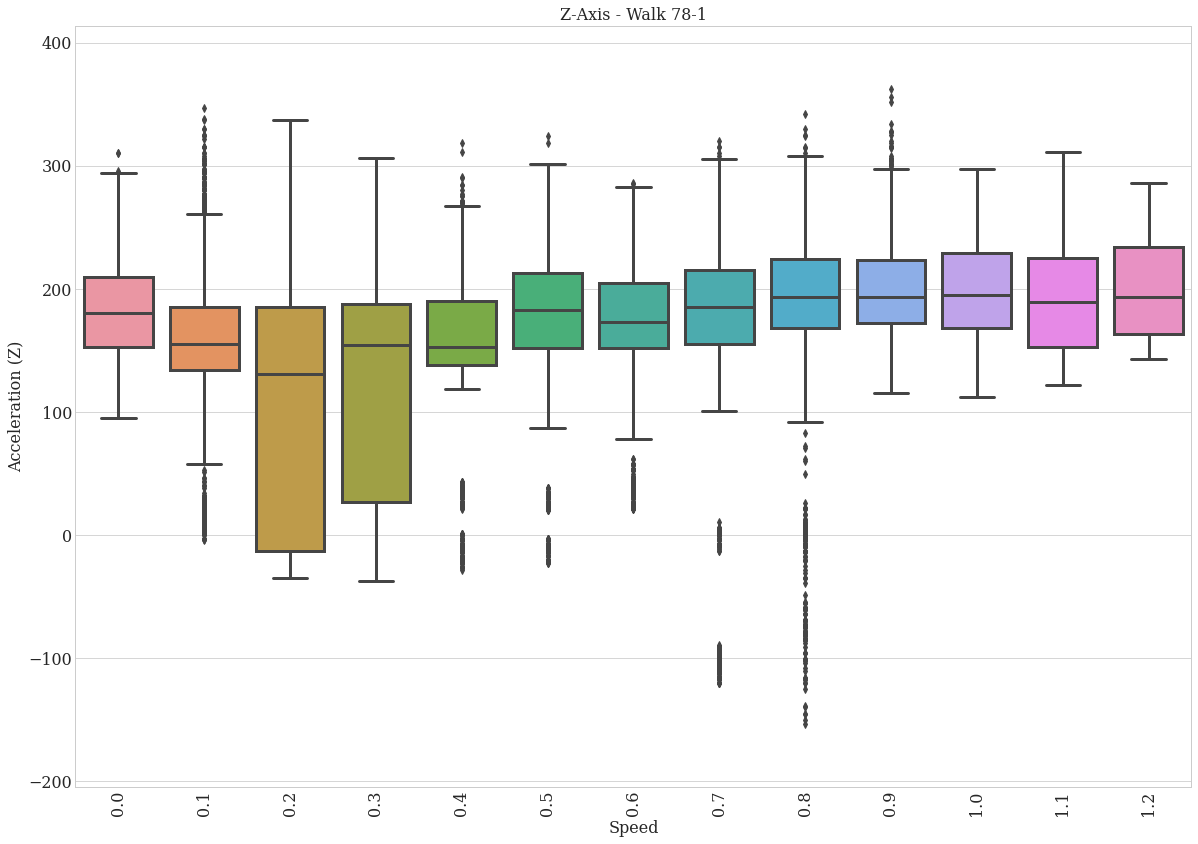

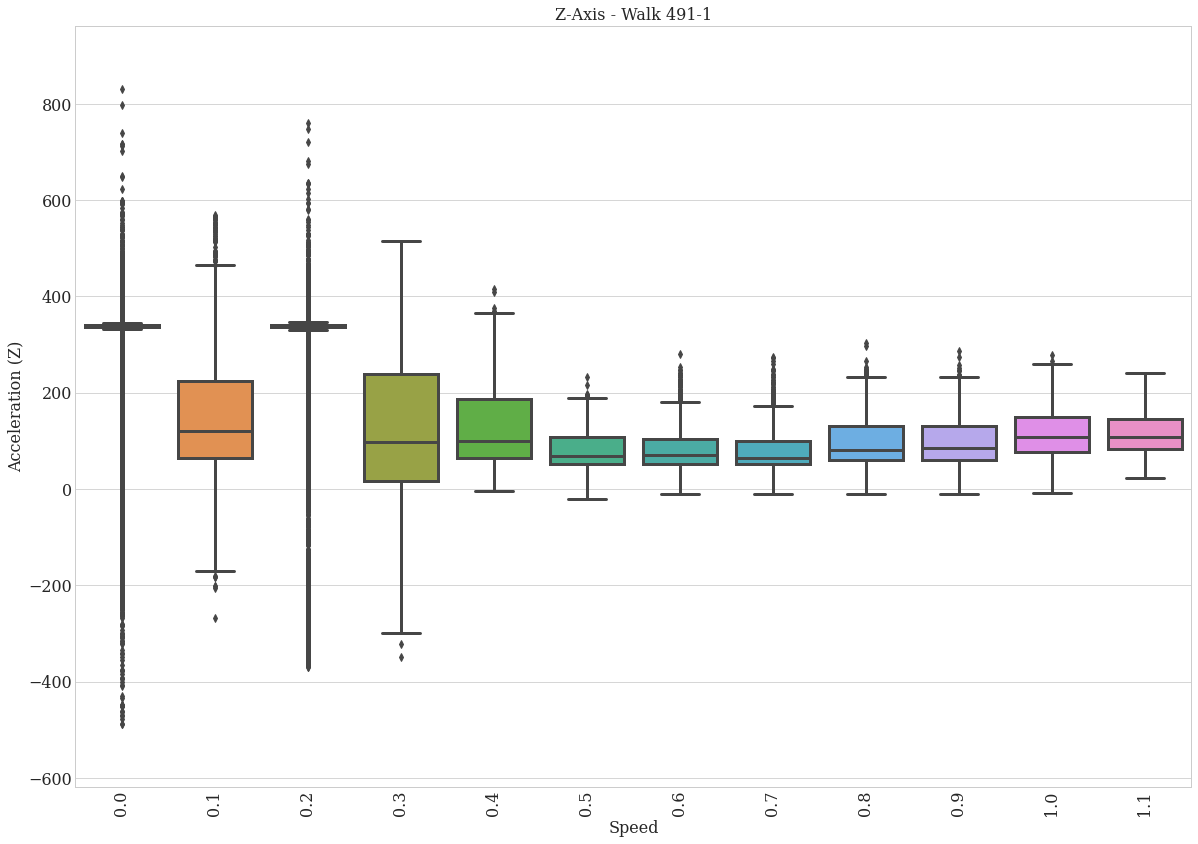

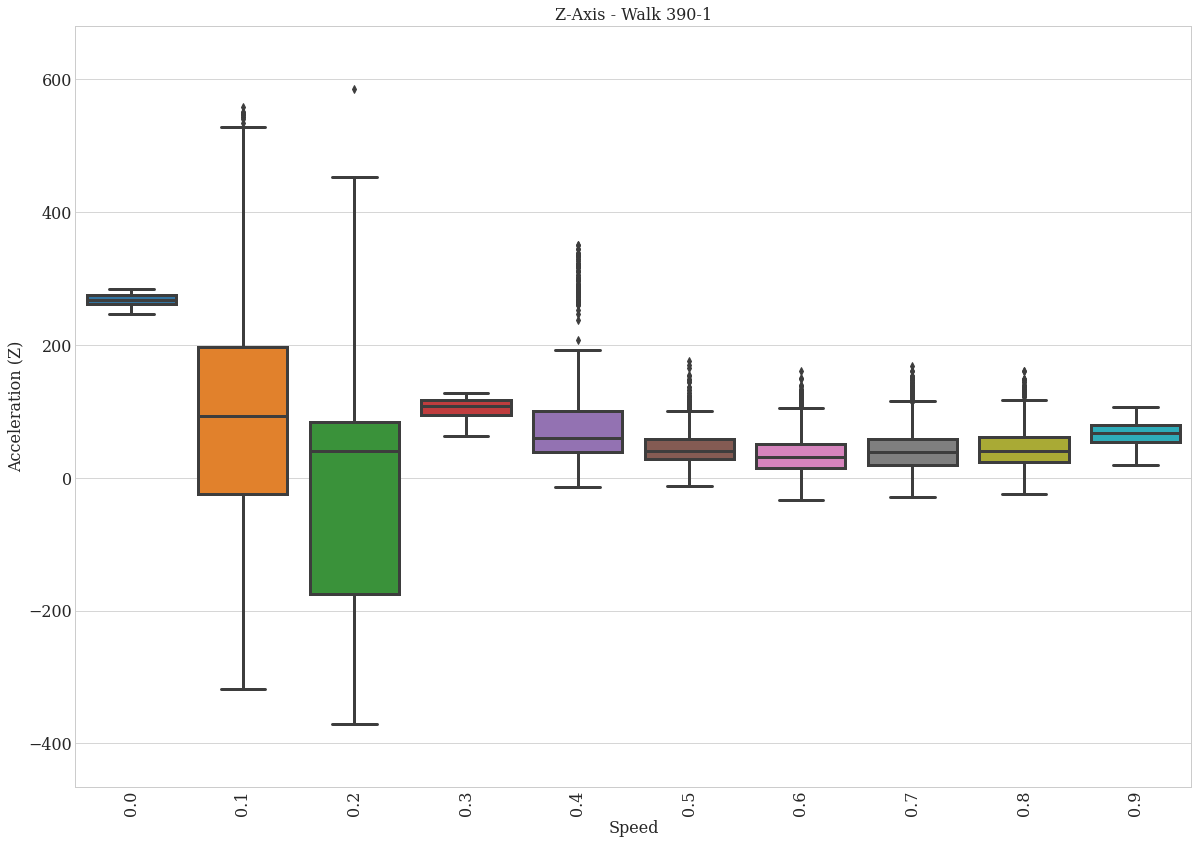

In [11]:
plt.rcParams["figure.figsize"] = (20,14)
ax={}
for i,walk in enumerate(sel_walks):
    this_data=raw_data[raw_data['walk']==walk]
    ax[i]=sns.boxplot(x='speed', y='z', data=this_data)
    ax[i].set_ylabel('Acceleration (Z)')
    ax[i].set_xlabel('Speed')
    ax[i].set_title('Z-Axis - Walk {}'.format(walk) )
    #ax[i].set_xticklabels(list(np.round(sorted_speeds,2)))
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 90)
    fig=ax[i].get_figure()
    fig.savefig("../reports/figures/{}boxplot_z_walk_{}.png".format(ref,walk))
    plt.show()

# Plotting box plots for rms-accl per subject

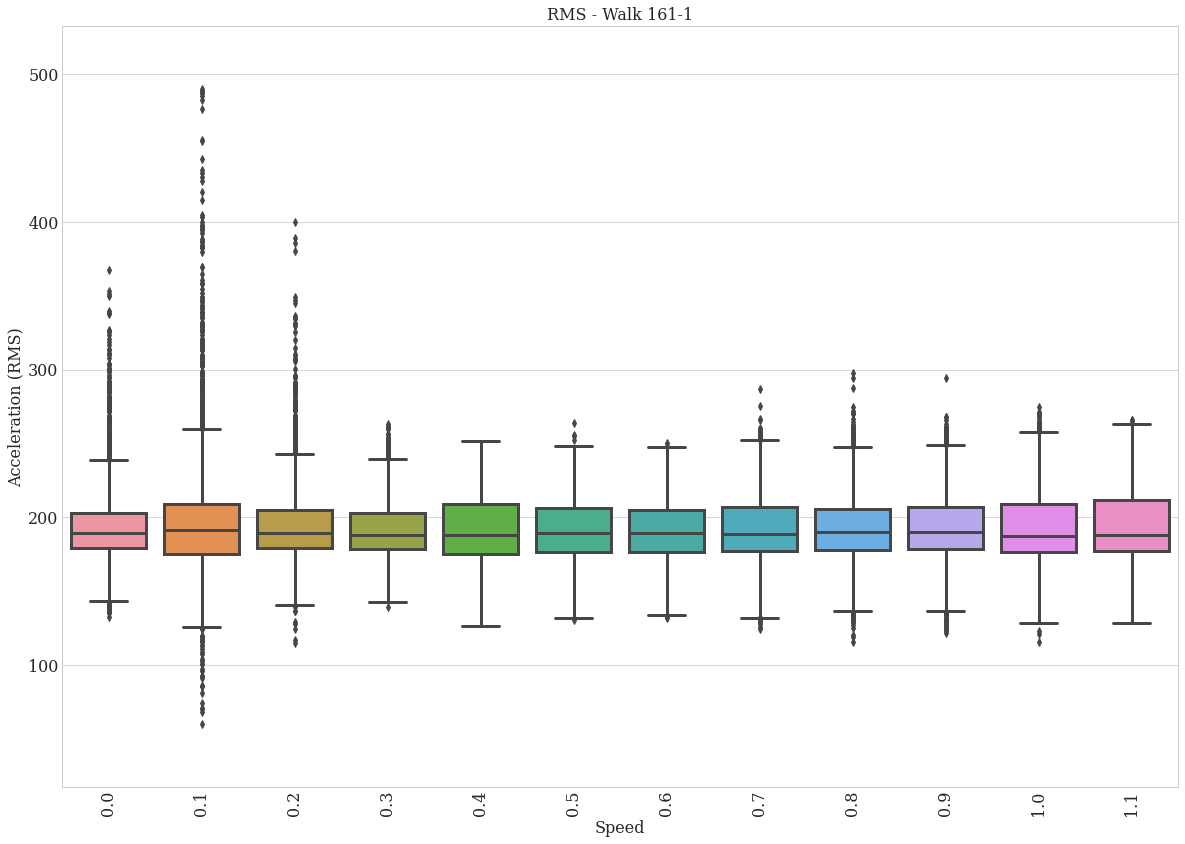

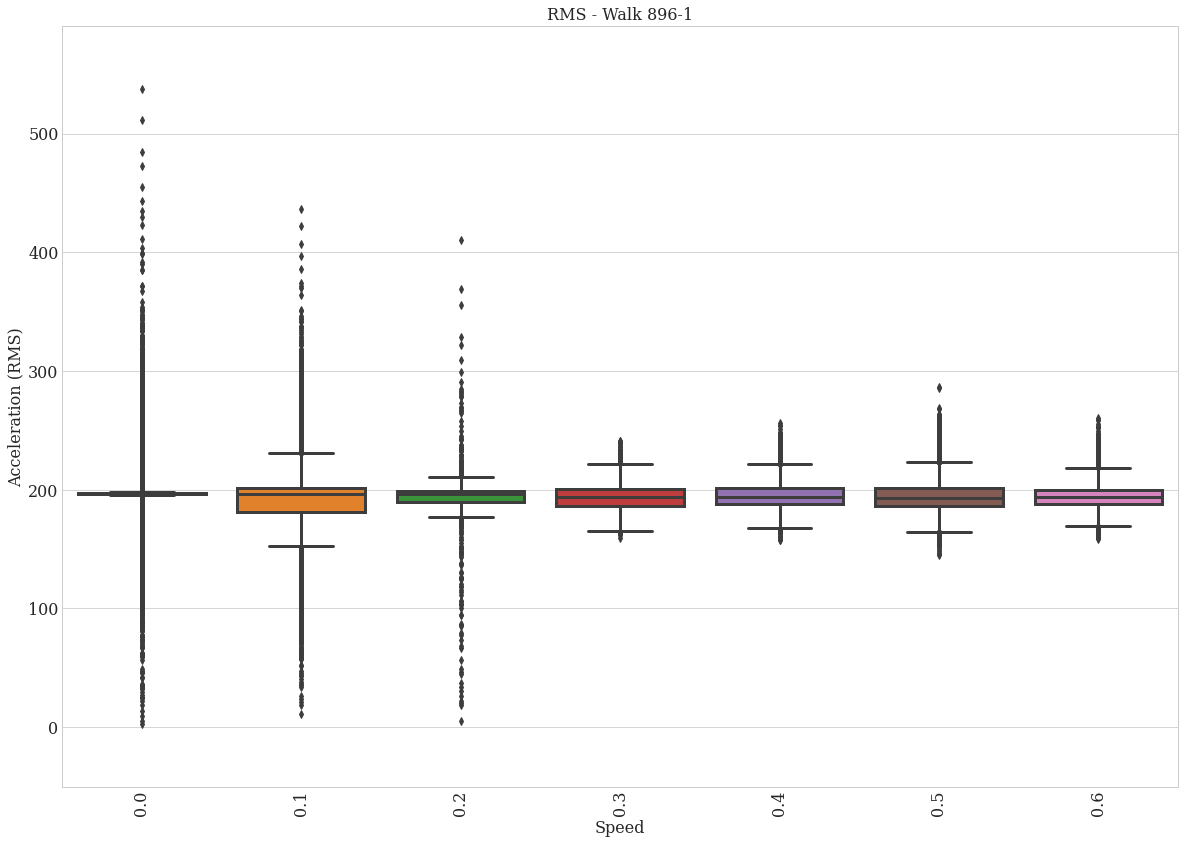

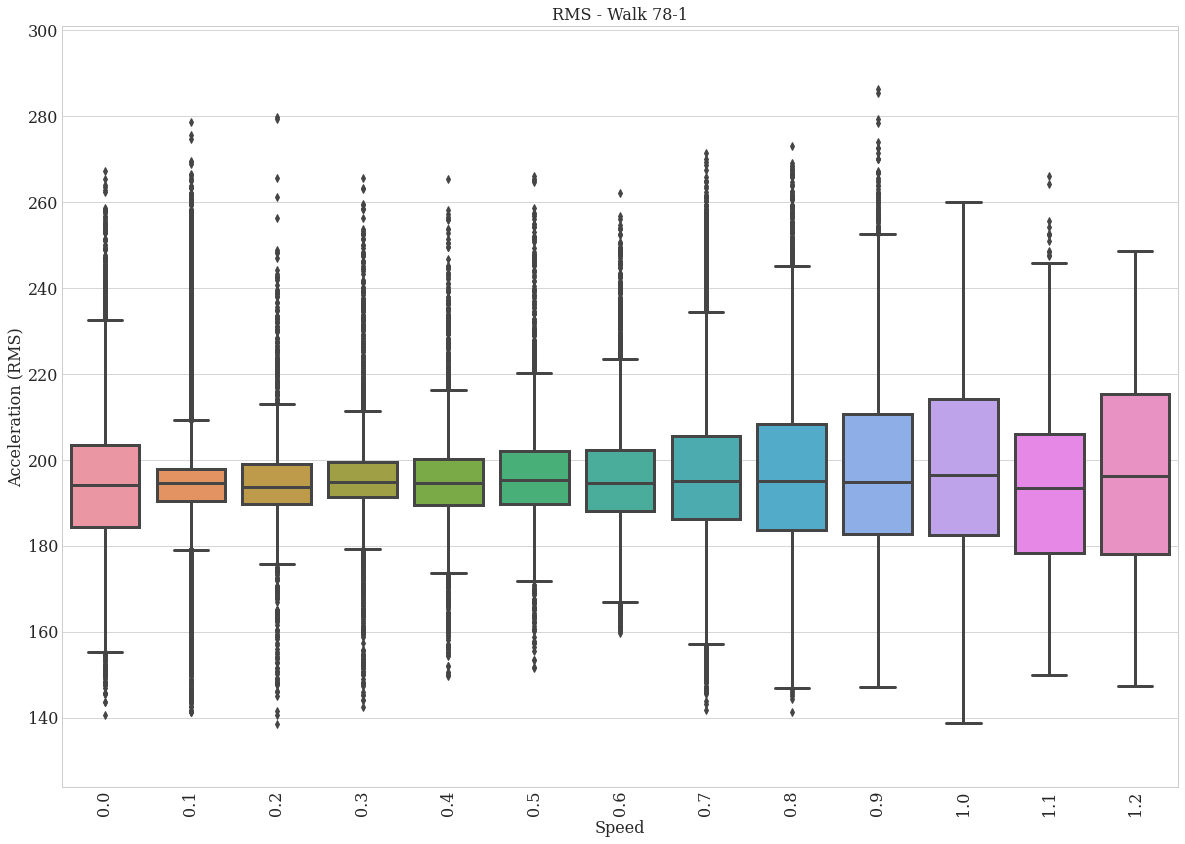

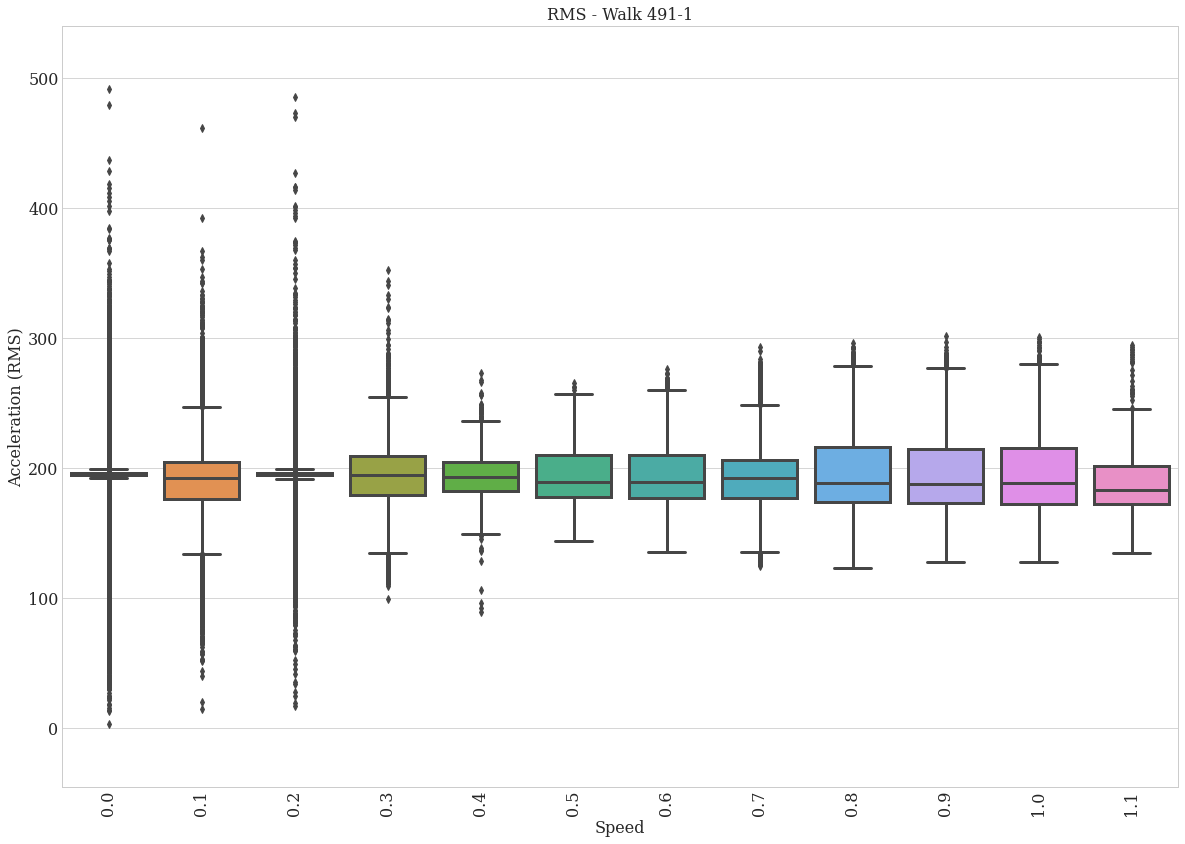

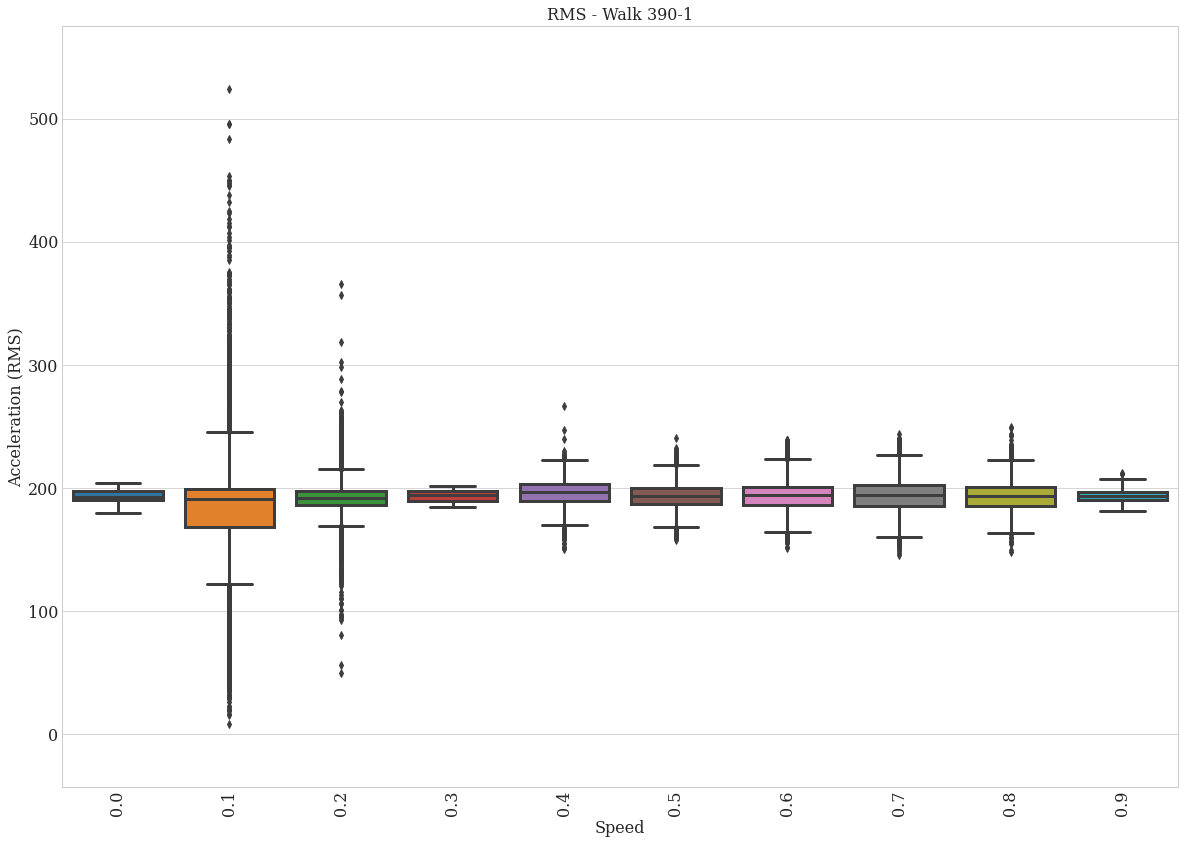

In [12]:
plt.rcParams["figure.figsize"] = (20,14)
ax={}
for i,walk in enumerate(sel_walks):
    this_data=raw_data[raw_data['walk']==walk]
    ax[i]=sns.boxplot(x='speed', y='rms', data=this_data)
    ax[i].set_ylabel('Acceleration (RMS)')
    ax[i].set_xlabel('Speed')
    ax[i].set_title('RMS - Walk {}'.format(walk) )
    #ax[i].set_xticklabels(list(np.round(sorted_speeds,2)))
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 90)
    fig=ax[i].get_figure()
    fig.savefig("../reports/figures/{}boxplot_rms_walk_{}.png".format(ref,walk))
    plt.show()

In [13]:
f.close()